<a href="https://colab.research.google.com/github/breeNep/mineriaDatos/blob/main/MD_1910_ARBOL_CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(type(iris))
print(iris.target)

<class 'sklearn.utils._bunch.Bunch'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
irisdf = pd.DataFrame(iris.data)
irisdf.columns = ['sepal length','sepal width','petal length','petal width']
irisdf['class'] = iris.target
irisdf.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Ver el numero de elementos por clase
irisdf['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

<Axes: xlabel='sepal length', ylabel='sepal width'>

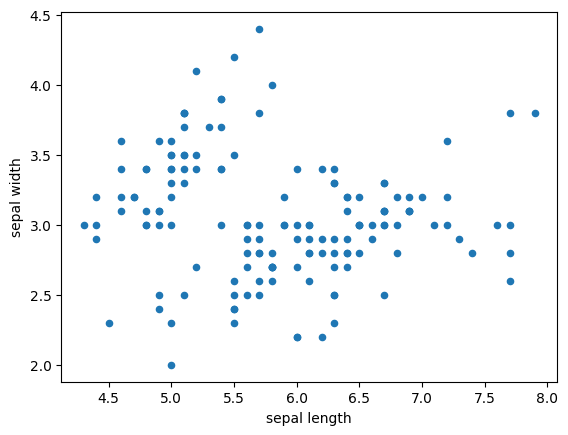

In [ ]:
#Grafica de series de la clase
irisdf.plot(kind='scatter',x='sepal length',y='sepal width')

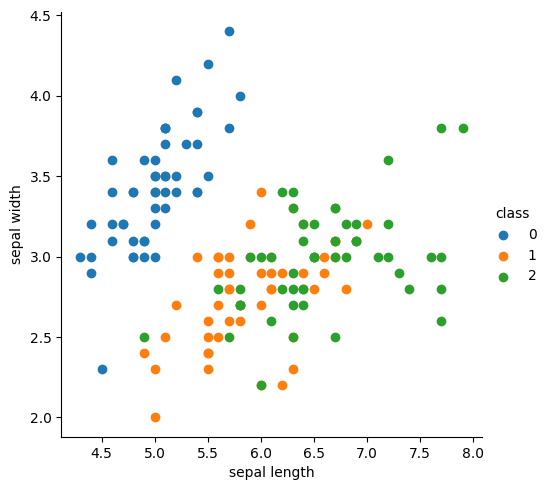

In [ ]:
#Gráfica de dispersión separando la clase
sns.FacetGrid(irisdf, hue= 'class', height=5).map(plt.scatter, 'sepal length', 'sepal width').add_legend()

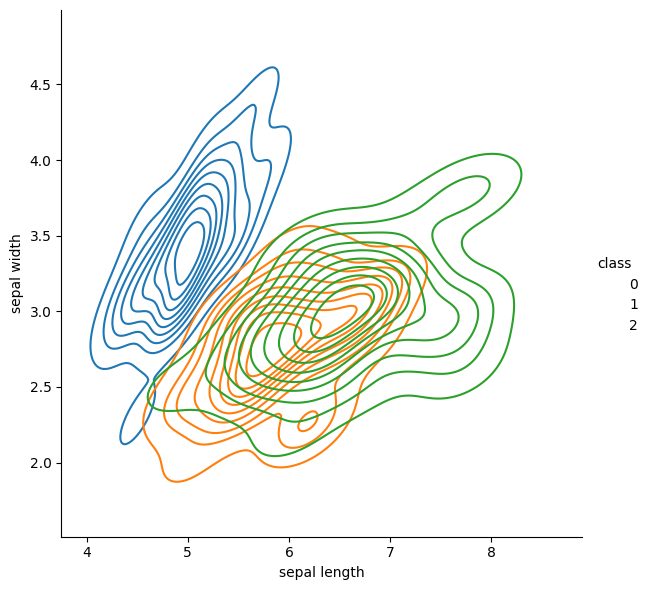

In [ ]:
sns.FacetGrid(irisdf, hue= 'class', height=6).map(sns.kdeplot, 'sepal length', 'sepal width').add_legend()

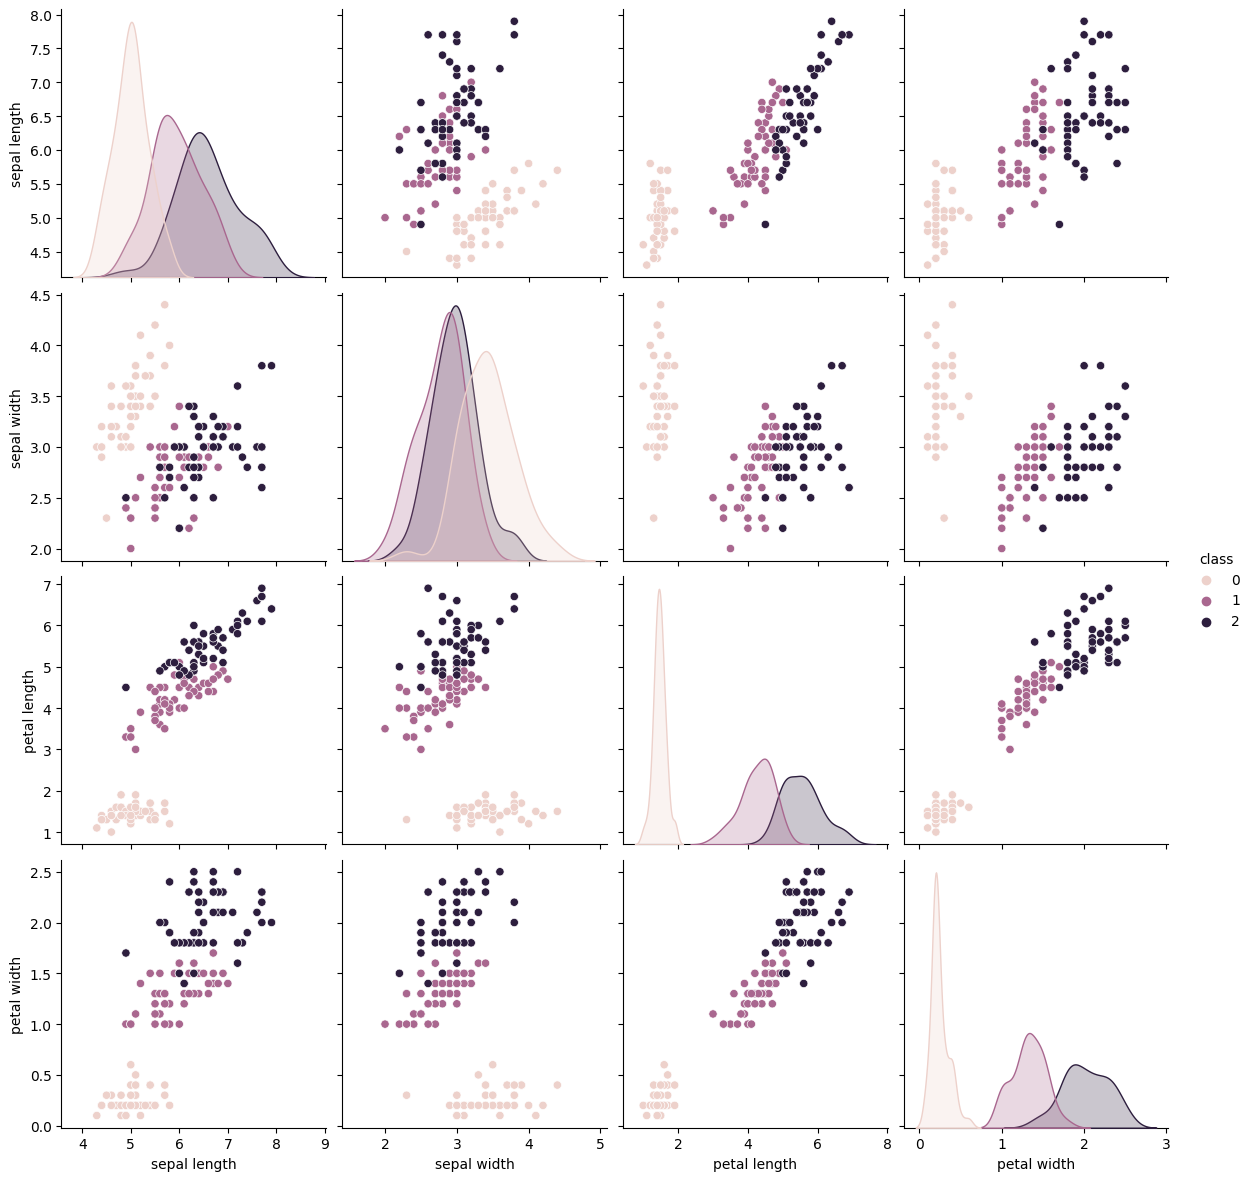

In [ ]:
#Relacion entre variables
sns.pairplot(irisdf, hue='class', height=3)

In [ ]:
#Arbol de clasificacion
treeclass = DecisionTreeClassifier(max_depth=5, random_state=1992)
treeclass.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=5, random_state=1992)

In [ ]:
print(treeclass)

DecisionTreeClassifier(max_depth=5, random_state=1992)


[Text(0.5, 0.9166666666666666, 'petal length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(0.5769230769230769, 0.75, 'petal width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolour'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolour'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolour'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolour'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(0.38461538461538464, 0.25, 'gin

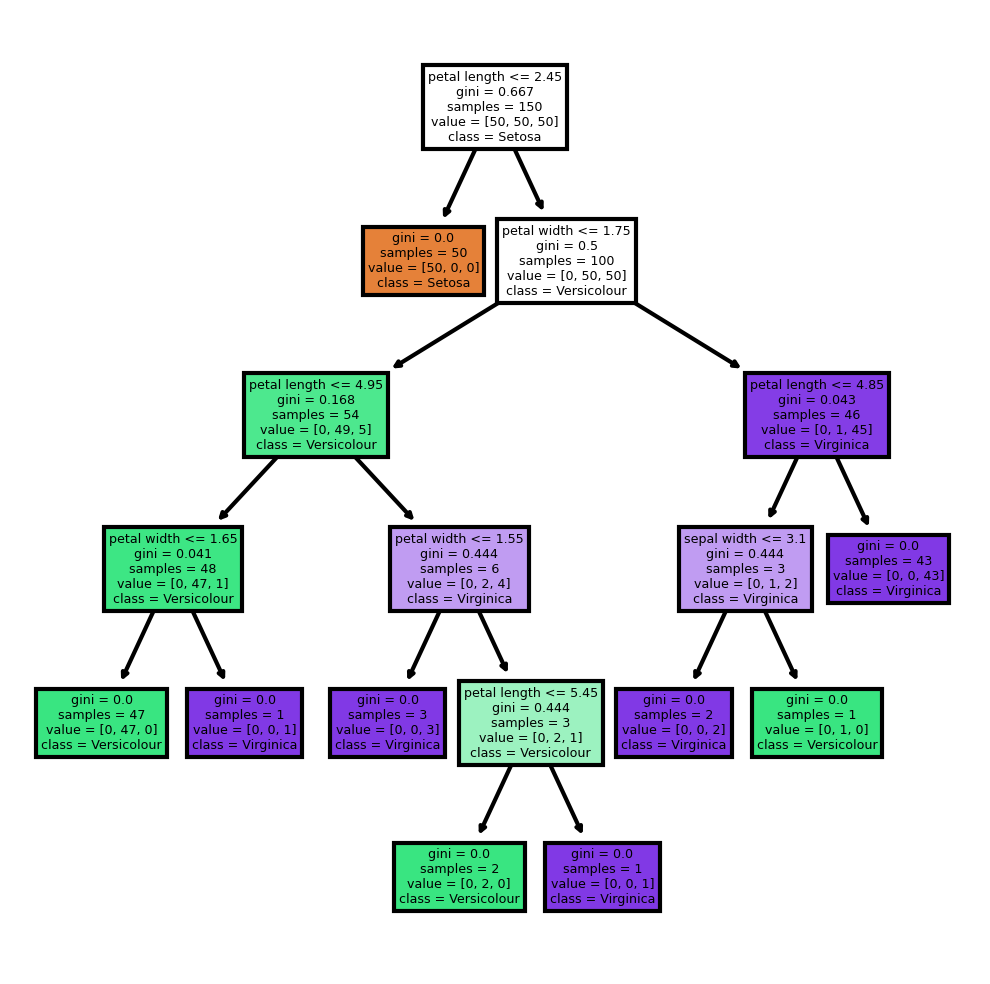

In [ ]:
from sklearn import tree
#Visualizar el arbol de decision
fn=['sepal length','sepal width','petal length','petal width']
cn=['Setosa','Versicolour','Virginica']
fig, axes = plt.subplots(nrows=1,figsize=(4,4), dpi=300)
tree.plot_tree(treeclass, feature_names=fn, class_names=cn, filled = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.25)
print(f"Son {X_train.shape[0]} datos de train y {X_test.shape[0]} datos de test")

Son 112 datos de train y 38 datos de test


In [ ]:
#Arbol de clasificacion
treeclass = DecisionTreeClassifier(max_depth=3, random_state=1992)
treeclass.fit(X_train, y_train)
score = treeclass.score(X_test,y_test)
score

0.9736842105263158

In [ ]:
#Toma por segmentos
kf = KFold(n_splits=5)
scores = cross_val_score(treeclass, X_train, y_train, cv=kf, scoring="accuracy")
print(type(scores))
print("Las metricas son los" , scores)
print("medias de las metricas", scores.mean())

<class 'numpy.ndarray'>
Las metricas son los [1.         0.86956522 0.81818182 0.90909091 0.86363636]
medias de las metricas 0.8920948616600791


In [ ]:
#Predicciones
Y_pred = treeclass.predict(X_test)
print(Y_pred)
print(y_test)
score_pred = metrics.accuracy_score(y_test, Y_pred)
print(score_pred)
print(metrics.confusion_matrix(y_test, Y_pred))

[1 0 2 2 0 2 2 0 0 0 0 2 2 0 2 0 1 0 0 1 2 0 1 0 0 2 1 0 0 1 2 2 1 2 2 2 2
 1]
[1 0 2 2 0 2 2 0 0 0 0 2 2 0 2 0 1 0 0 1 2 0 1 0 0 2 1 0 0 2 2 2 1 2 2 2 2
 1]
0.9736842105263158
[[15  0  0]
 [ 0  7  0]
 [ 0  1 15]]


In [ ]:
! ls -la

total 16
drwxr-xr-x 1 root root 4096 Sep  7 13:24 .
drwxr-xr-x 1 root root 4096 Sep  9 04:17 ..
drwxr-xr-x 4 root root 4096 Sep  7 13:23 .config
drwxr-xr-x 1 root root 4096 Sep  7 13:24 sample_data


In [ ]:
irisul = pd.read_csv('iris_dataset_sintetico.csv')
irisul.drop('id', axis=1, inplace=True)
irisul

,sepal_length,sepal_width,petal_length,petal_width
0,6.17,4.03,3.98,1.24
1,5.57,3.15,4.84,0.51
2,6.03,2.15,1.15,2.43
3,7.48,2.83,4.18,0.73
4,6.83,4.39,4.82,0.43
...,...,...,...,...
295,6.11,3.76,6.12,1.34
296,4.46,2.37,4.27,2.50
297,4.93,2.82,6.66,1.55
298,7.69,3.75,6.77,0.11


In [ ]:
X = np.array(irisul)
X

array([[6.17, 4.03, 3.98, 1.24],
       [5.57, 3.15, 4.84, 0.51],
       [6.03, 2.15, 1.15, 2.43],
       ...,
       [4.93, 2.82, 6.66, 1.55],
       [7.69, 3.75, 6.77, 0.11],
       [5.2 , 2.03, 5.89, 1.43]])

In [ ]:
Y = treeclass.predict(X)
Y

array([1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0,
       0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2])

In [ ]:
iris_pred = irisul
iris_pred['specie'] = Y
iris_pred['specie'].replace({0:'Iris-Setosa',1:'Iris-Versicolour',2:'Iris-Virginica'}, inplace=True)
iris_pred

,sepal_length,sepal_width,petal_length,petal_width,specie
0,6.17,4.03,3.98,1.24,Iris-Versicolour
1,5.57,3.15,4.84,0.51,Iris-Versicolour
2,6.03,2.15,1.15,2.43,Iris-Setosa
3,7.48,2.83,4.18,0.73,Iris-Versicolour
4,6.83,4.39,4.82,0.43,Iris-Versicolour
...,...,...,...,...,...
295,6.11,3.76,6.12,1.34,Iris-Virginica
296,4.46,2.37,4.27,2.50,Iris-Versicolour
297,4.93,2.82,6.66,1.55,Iris-Virginica
298,7.69,3.75,6.77,0.11,Iris-Virginica


In [ ]:
#De los 150 datos que tenemos, los distribuye aleatoriamente
iris_pred.groupby('specie').size()

specie
Iris-Setosa          81
Iris-Versicolour    127
Iris-Virginica       92
dtype: int64

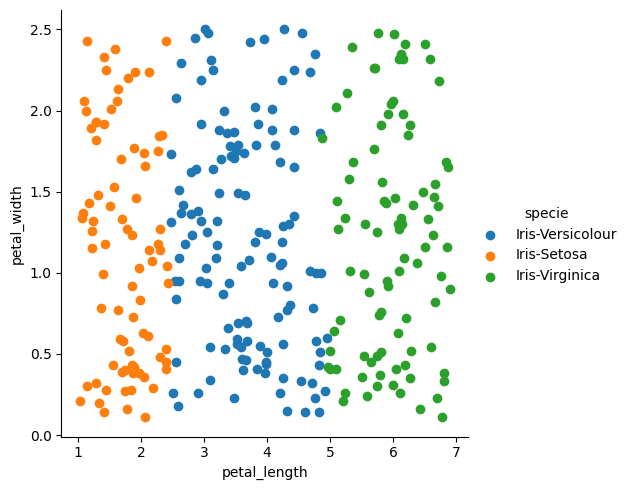

In [ ]:
sns.FacetGrid(iris_pred, hue= 'specie', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

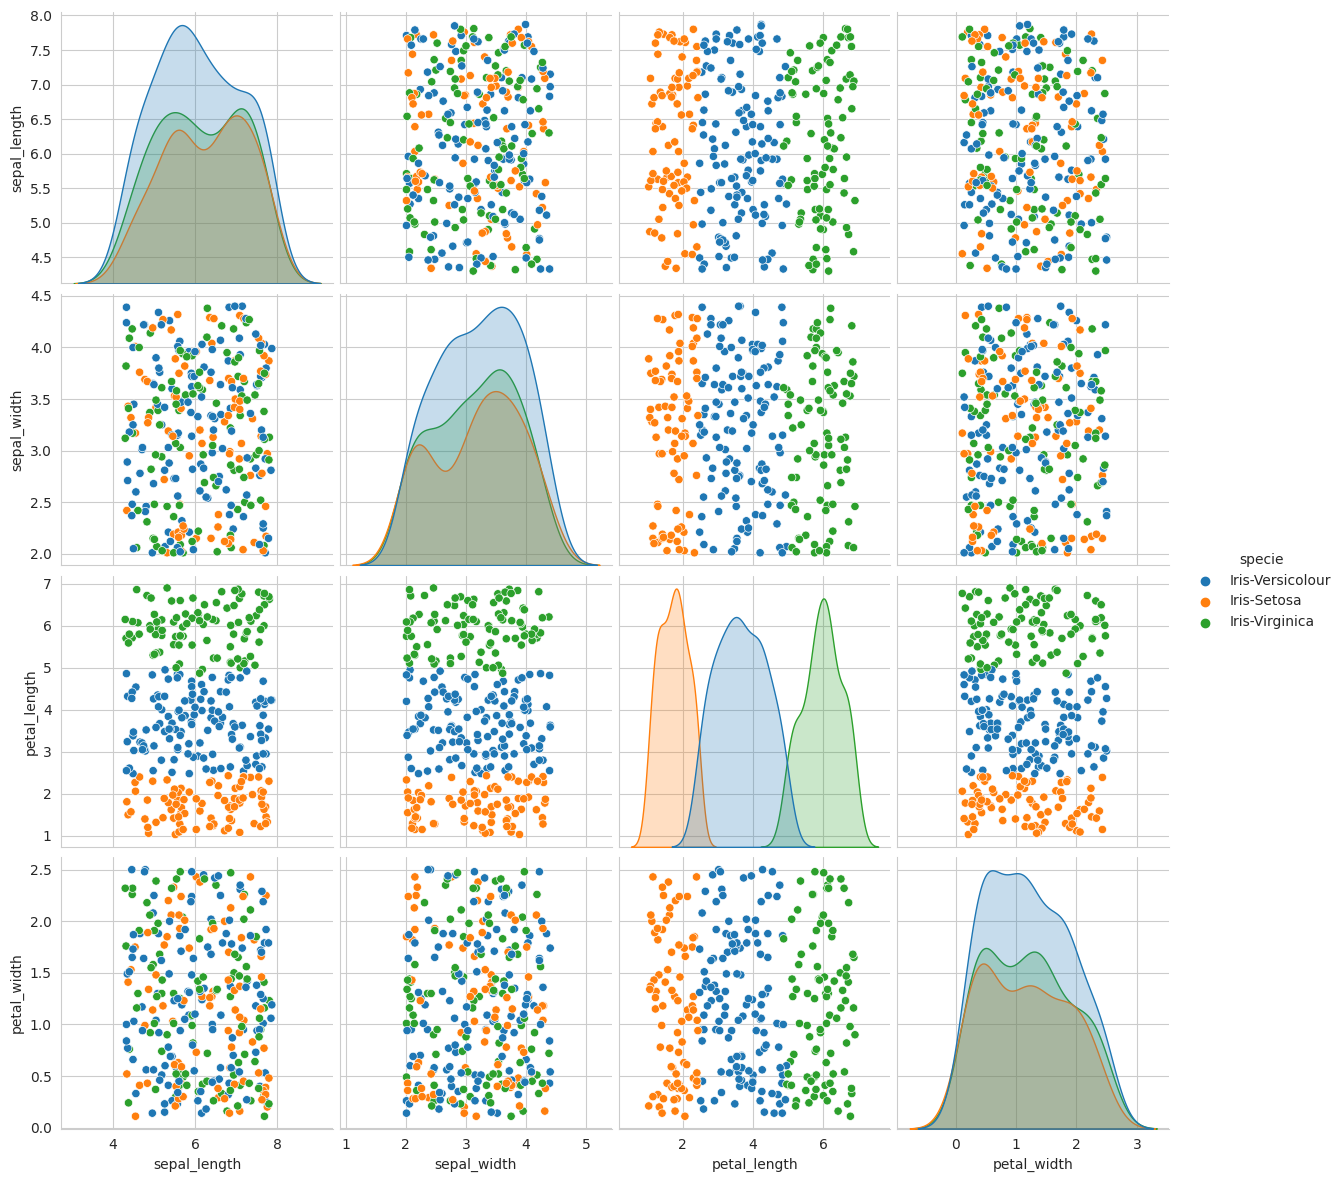

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris_pred, hue='specie', height=3)
plt.show()

<Axes: xlabel='specie', ylabel='petal_length'>

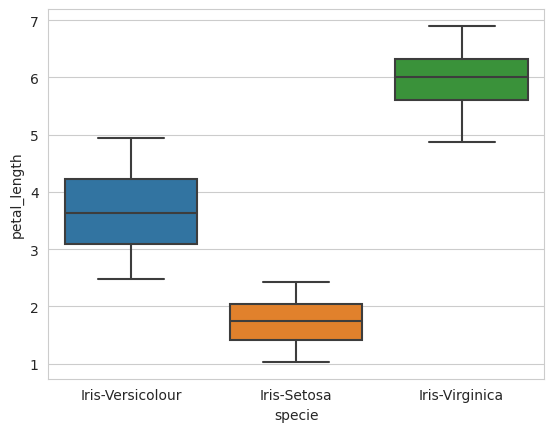

In [ ]:
sns.boxplot(x='specie', y='petal_length',data=iris_pred)

<Axes: xlabel='specie', ylabel='petal_length'>

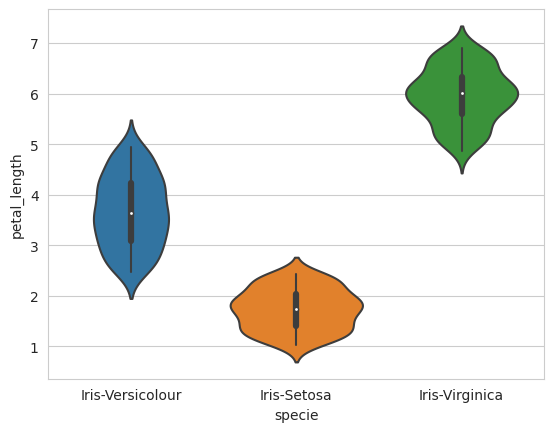

In [ ]:
sns.violinplot(x='specie', y='petal_length',data=iris_pred)

In [ ]:
iris_pred.to_csv('iris_dataset_sintetico_pred.csv')

In [ ]:
! head iris_dataset_sintetico_pred.csv

,sepal_length,sepal_width,petal_length,petal_width,specie
0,6.17,4.03,3.98,1.24,Iris-Versicolour
1,5.57,3.15,4.84,0.51,Iris-Versicolour
2,6.03,2.15,1.15,2.43,Iris-Setosa
3,7.48,2.83,4.18,0.73,Iris-Versicolour
4,6.83,4.39,4.82,0.43,Iris-Versicolour
5,7.1,3.34,5.0,0.41,Iris-Virginica
6,4.98,3.65,2.55,2.08,Iris-Versicolour
7,5.71,2.01,5.75,0.49,Iris-Virginica
8,7.35,2.76,2.39,2.43,Iris-Setosa


In [ ]:
#Realiza objetos, serializar
import pickle
file = open('iris_treeclass.pk', 'wb')
tree_saved = pickle.dump(treeclass, file)
file.close()

In [ ]:
irisul = pd.read_csv('iris_dataset_sintetico.csv')
irisul.drop('id', axis=1, inplace=True)
X = np.array(irisul)
Y = treeclass.predict(X)
Y

NameError: ignored